# https://colab.research.google.com/drive/1B-Ejvuo9bpZt6YWYvYc6KUmflGIBgMhk?usp=sharing

In [ ]:
import itertools
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import pandas as pd
import numpy as np
import matplotlib.ticker as ticker
from sklearn import preprocessing
%matplotlib inline

In [ ]:
!wget -O loan_train.csv https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/loan_train.csv

--2023-01-08 12:57:59--  https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/loan_train.csv
Resolving s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)... 67.228.254.196
Connecting to s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)|67.228.254.196|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 23101 (23K) [text/csv]
Saving to: ‘loan_train.csv’

loan_train.csv      100%[===================>]  22.56K  --.-KB/s    in 0.01s   

2023-01-08 12:57:59 (1.81 MB/s) - ‘loan_train.csv’ saved [23101/23101]



### Veri Seti

Bu veri seti geçmiş kredilerle ilgilidir. Loan_train.csv veri seti, kredisi zaten ödenmiş veya temerrüde düşmüş 346 müşterinin ayrıntılarını içerir. Aşağıdaki alanları içerir:

| Field          | Açıklama                                                                           |
|----------------|---------------------------------------------------------------------------------------|
| Loan_status    | Bir kredinin tahsilatta ödenip ödenmediği                                          |
| Principal      | Temel anapara kredisi tutarı                                                    |
| Terms          | Haftalık (7 gün), iki haftada bir ve aylık ödeme planı olabilen başlangıç koşulları |
| Effective_date | Kredinin başlangıç tarihi                                         |
| Due_date       | Tek seferlik ödeme planı olduğundan, her kredinin tek bir ödeme tarihi vardır.                |
| Age            | Müşterinin yaşı                                                                      |
| Education      | Müşterinin eğitim durumu                                                              |
| Gender         | Müşterinin cinsiyeti                                                              |

### VERİ SETİNİ OKUMA

In [ ]:
df = pd.read_csv('loan_train.csv')
df

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,0,0,PAIDOFF,1000,30,9/8/2016,10/7/2016,45,High School or Below,male
1,2,2,PAIDOFF,1000,30,9/8/2016,10/7/2016,33,Bechalor,female
2,3,3,PAIDOFF,1000,15,9/8/2016,9/22/2016,27,college,male
3,4,4,PAIDOFF,1000,30,9/9/2016,10/8/2016,28,college,female
4,6,6,PAIDOFF,1000,30,9/9/2016,10/8/2016,29,college,male
...,...,...,...,...,...,...,...,...,...,...
341,394,394,COLLECTION,800,15,9/11/2016,9/25/2016,32,High School or Below,male
342,395,395,COLLECTION,1000,30,9/11/2016,10/10/2016,25,High School or Below,male
343,397,397,COLLECTION,800,15,9/12/2016,9/26/2016,39,college,male
344,398,398,COLLECTION,1000,30,9/12/2016,11/10/2016,28,college,male


In [ ]:
df.shape # SATIR SUTUN SAYISI

(346, 10)

### DATETIME'a dönüştürme

In [ ]:
df['due_date'] = pd.to_datetime(df['due_date'])
df['effective_date'] = pd.to_datetime(df['effective_date'])
df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,0,0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,male
1,2,2,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,female
2,3,3,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,male
3,4,4,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,female
4,6,6,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,college,male


# Veri görselleştirme ve ön işleme


Veri kümemizde her sınıftan kaç tane olduğunu görelim.

In [ ]:
df['loan_status'].value_counts()

PAIDOFF       260
COLLECTION     86
Name: loan_status, dtype: int64

260 kişi borcunu zamanında ödedi, 86 kişi tahsilat yaptı

Verileri daha iyi anlamak için bazı sütunları çizelim:

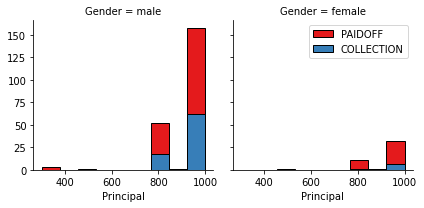

In [ ]:
import seaborn as sns

bins = np.linspace(df.Principal.min(), df.Principal.max(), 10)
g = sns.FacetGrid(df, col="Gender", hue="loan_status", palette="Set1", col_wrap=2)
g.map(plt.hist, 'Principal', bins=bins, ec="k")

g.axes[-1].legend()
plt.show()

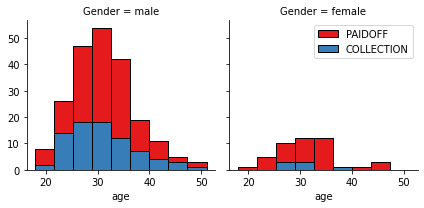

In [ ]:
bins = np.linspace(df.age.min(), df.age.max(), 10)
g = sns.FacetGrid(df, col="Gender", hue="loan_status", palette="Set1", col_wrap=2)
g.map(plt.hist, 'age', bins=bins, ec="k")

g.axes[-1].legend()
plt.show()

# Ön işleme: Özellik seçimi

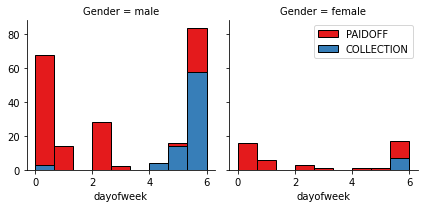

In [ ]:
df['dayofweek'] = df['effective_date'].dt.dayofweek
bins = np.linspace(df.dayofweek.min(), df.dayofweek.max(), 10)
g = sns.FacetGrid(df, col="Gender", hue="loan_status", palette="Set1", col_wrap=2)
g.map(plt.hist, 'dayofweek', bins=bins, ec="k")
g.axes[-1].legend()
plt.show()


Krediyi hafta sonunda alan kişilerin borcunu ödemediğini görüyoruz, bu nedenle 4. günden daha kısa bir eşik değer belirlemek için Özellik ikilileştirmeyi kullanalım

In [ ]:
df['weekend'] = df['dayofweek'].apply(lambda x: 1 if (x>3)  else 0)
df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender,dayofweek,weekend
0,0,0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,male,3,0
1,2,2,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,female,3,0
2,3,3,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,male,3,0
3,4,4,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,female,4,1
4,6,6,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,college,male,4,1


## Kategorik özellikleri sayısal değerlere dönüştürün

#Cinsiyete bakalım:

In [ ]:
df.groupby(['Gender'])['loan_status'].value_counts(normalize=True)

Gender  loan_status
female  PAIDOFF        0.865385
        COLLECTION     0.134615
male    PAIDOFF        0.731293
        COLLECTION     0.268707
Name: loan_status, dtype: float64

Kadınların %86'sı oraya kredi öderken, erkeklerin sadece %73'ü oraya kredi ödüyor

Erkeği 0'a ve kadını 1'e çevirelim:

In [ ]:
df['Gender'].replace(to_replace=['male','female'], value=[0,1],inplace=True)
df['Gender']
#df.head()

0      0
1      1
2      0
3      1
4      0
      ..
341    0
342    0
343    0
344    0
345    0
Name: Gender, Length: 346, dtype: int64

## KUTU GRAFİĞİ

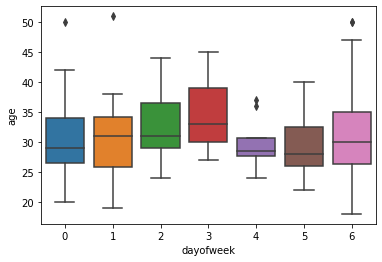

In [ ]:
sns.boxplot(x="dayofweek",y="age", data=df)

#ISI Grafiği


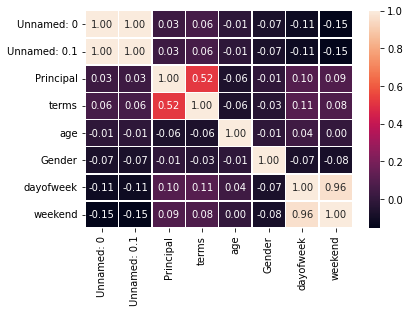

In [ ]:
sns.heatmap(df.corr(),annot=True,linewidths=.5,fmt=".2f")


## Eğitim Durumuna Göre Kredi Ödeme Durumu


In [ ]:
df.groupby(['education'])['loan_status'].value_counts(normalize=True)

education             loan_status
Bechalor              PAIDOFF        0.750000
                      COLLECTION     0.250000
High School or Below  PAIDOFF        0.741722
                      COLLECTION     0.258278
Master or Above       COLLECTION     0.500000
                      PAIDOFF        0.500000
college               PAIDOFF        0.765101
                      COLLECTION     0.234899
Name: loan_status, dtype: float64

#### Çalışılacak Sütunlar

In [ ]:
df[['Principal','terms','age','Gender','education']].head()

,Principal,terms,age,Gender,education
0,1000,30,45,0,High School or Below
1,1000,30,33,1,Bechalor
2,1000,15,27,0,college
3,1000,30,28,1,college
4,1000,30,29,0,college


#### Eğitim Durumlarına Göre Tablo Düzenlendi

In [ ]:
Feature = df[['Principal','terms','age','Gender','weekend']]
Feature = pd.concat([Feature,pd.get_dummies(df['education'])], axis=1)
Feature.drop(['Master or Above'], axis = 1,inplace=True)
Feature.head()


,Principal,terms,age,Gender,weekend,Bechalor,High School or Below,college
0,1000,30,45,0,0,0,1,0
1,1000,30,33,1,0,1,0,0
2,1000,15,27,0,0,0,0,1
3,1000,30,28,1,1,0,0,1
4,1000,30,29,0,1,0,0,1


### Öznitelik Seçimi

#Özellik kümelerini tanımlayalım, X:

In [ ]:
X = Feature
X[0:5]

,Principal,terms,age,Gender,weekend,Bechalor,High School or Below,college
0,1000,30,45,0,0,0,1,0
1,1000,30,33,1,0,1,0,0
2,1000,15,27,0,0,0,0,1
3,1000,30,28,1,1,0,0,1
4,1000,30,29,0,1,0,0,1


In [ ]:
y = pd.get_dummies(df['loan_status'])['PAIDOFF'].values
y[0:5]

array([1, 1, 1, 1, 1], dtype=uint8)

## Verileri Normalize Et

Veri Standardizasyonu, verilere sıfır ortalama ve birim varyans verir (teknik olarak train testi bölünmesinden sonra yapılmalıdır)

In [ ]:
X= preprocessing.StandardScaler().fit(X).transform(X)
X[0:5]

array([[ 0.51578458,  0.92071769,  2.33152555, -0.42056004, -1.20577805,
        -0.38170062,  1.13639374, -0.86968108],
       [ 0.51578458,  0.92071769,  0.34170148,  2.37778177, -1.20577805,
         2.61985426, -0.87997669, -0.86968108],
       [ 0.51578458, -0.95911111, -0.65321055, -0.42056004, -1.20577805,
        -0.38170062, -0.87997669,  1.14984679],
       [ 0.51578458,  0.92071769, -0.48739188,  2.37778177,  0.82934003,
        -0.38170062, -0.87997669,  1.14984679],
       [ 0.51578458,  0.92071769, -0.3215732 , -0.42056004,  0.82934003,
        -0.38170062, -0.87997669,  1.14984679]])

# SINIFLANDIRMA 

Şimdi sıra sizde, doğru bir model oluşturmak için eğitim setini kullanın. Ardından, modelin doğruluğunu bildirmek için test setini kullanın.
Aşağıdaki algoritmaları uygulayacağız:
- K Nearest Neighbor(KNN)
- Decision Tree
- Support Vector Machine
- Logistic Regression





# K-En Yakın Komşu (KNN)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn import metrics
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.10, random_state=4)


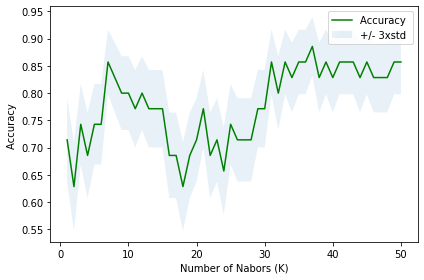

In [ ]:
mean_acc=np.zeros(50)
std_acc = np.zeros(50)
for n in range(1,51):
    knnmodel=KNeighborsClassifier(n_neighbors=n).fit(X_train,y_train)
    y_pred=knnmodel.predict(X_test)
    mean_acc[n-1]=metrics.accuracy_score(y_test,y_pred)
    std_acc[n-1]=np.std(y_pred==y_test)/np.sqrt(y_pred.shape[0])
    
plt.plot(range(1,51),mean_acc,'g')
plt.fill_between(range(1,51),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.legend(('Accuracy ', '+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Nabors (K)')
plt.tight_layout()
plt.show()

In [ ]:
print( "En iyi dogruluk orani", mean_acc.max(), "ile k=", mean_acc.argmax()+1) 

En iyi dogruluk orani 0.8857142857142857 ile k= 37


# **KNN-HILL CLIMBING**

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

# create a KNN model
knn = KNeighborsClassifier()

# define the parameter distribution
param_dist = {'n_neighbors': range(1, 51)}

# create a RandomizedSearchCV object
random_search = RandomizedSearchCV(knn, param_dist, n_iter=10, cv=5, scoring='accuracy', n_jobs=-1, random_state=42)

# fit the randomized search object to the training data
random_search.fit(X_train, y_train)

# print the best parameters
print("Best parameters:", random_search.best_params_)

# print the best score
print("Best score:", random_search.best_score_)

# evaluate the model on the test data
y_pred = random_search.predict(X_test)
accuracy = metrics.accuracy_score(y_test, y_pred)
print("Test accuracy:", accuracy)



Best parameters: {'n_neighbors': 46}
Best score: 0.7428059395801332
Test accuracy: 0.8285714285714286


# ***KNN-SIMULATED ANNEALING***

In [ ]:
import random
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Sıcaklık değişimini kontrol eden sabitler
T_INITIAL = 100  # İlk sıcaklık
T_FINAL = 0.01   # Son sıcaklık
T_DECAY = 0.99   # Sıcaklık azalış hızı

# Sıcaklığı azaltmayı ve tahminleri yapmayı kontrol eden döngü
t = T_INITIAL
best_accuracy = 0
best_k = 0
while t > T_FINAL:
    # KNN sınıflandırıcısını oluşturun
    knn = KNeighborsClassifier(n_neighbors=random.randint(1, 50))

    # Modeli eğitin
    knn.fit(X_train, y_train)

    # Test verilerine dayalı olarak tahminler yapın
    predictions = knn.predict(X_test)

    # Tahminlerin doğruluğunu ölçün
    accuracy = accuracy_score(y_test, predictions)

    # Eğer bu doğruluk oranı şimdiye kadarki en iyi doğruluk oranından daha iyiyse,
    # en iyi doğruluk oranını ve en iyi k değerini güncelleyin
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_k = knn.n_neighbors
    # Eğer bu doğruluk oranı daha düşükse,
    # bir adım geri gidebilme olasılığını hesaplayın ve rastgele bir sayı ile karşılaştırın
    else:
        # Rastgele sayı oluşturun
        rand = random.uniform(0, 1)
        
        # Sıcaklık azalışını hesaplayın
        delta_e = best_accuracy - accuracy
        probability = np.exp(-delta_e / t)

        # Eğer rastgele sayı, olasılıktan düşükse,
        # en iyi doğruluk oranını ve en iyi k değerini geri alın
        if rand < probability:
            best_accuracy = accuracy
            best_k = knn.n_neighbors

    # Sıcaklığı azaltın
    t *= T_DECAY

print("En İyi Doğruluk Oranı:", best_accuracy)
print("En İyi K Değeri:", best_k)
print("Test accuracy:", accuracy)


En İyi Doğruluk Oranı: 0.8571428571428571
En İyi K Değeri: 45
Test accuracy: 0.7142857142857143


# KNN ROC Eğrisi


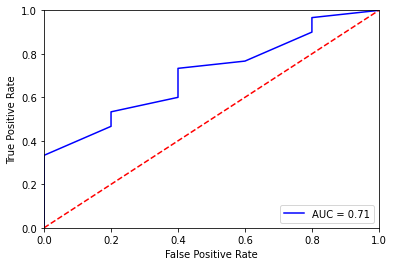

In [ ]:
from sklearn.metrics import roc_curve, auc

# Compute predicted probabilities: y_pred_prob
y_pred_prob = knnmodel.predict_proba(X_test)[:,1]

# Generate ROC curve values: fpr, tpr, thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# Compute ROC AUC
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.plot(fpr, tpr, 'b', label='AUC = %0.2f' % roc_auc)
plt.plot([0, 1], [0, 1], 'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc='lower right')
plt.show()






# Karar Ağacı

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
dtmodel = DecisionTreeClassifier(criterion="entropy", max_depth = 4)
dtmodel.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=4)

In [ ]:
y_pred=dtmodel.predict(X_test)
TreeAccuracy=metrics.accuracy_score(y_test,y_pred)
TreeAccuracy

0.6857142857142857

#Karar Ağaci Roc Eğrisi


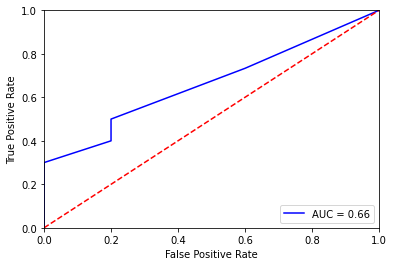

In [ ]:
from sklearn.metrics import roc_curve, auc

# Compute predicted probabilities: y_pred_prob
y_pred_prob = dtmodel.predict_proba(X_test)[:,1]

# Generate ROC curve values: fpr, tpr, thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# Compute ROC AUC
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.plot(fpr, tpr, 'b', label='AUC = %0.2f' % roc_auc)
plt.plot([0, 1], [0, 1], 'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc='lower right')
plt.show()


# HILL CLIMBING-KARAR AĞACI

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

# Set up the decision tree model
dtmodel = DecisionTreeClassifier(criterion="entropy", max_depth = 4)

# Set up the grid search with 5-fold cross validation
parameters = {'max_depth': range(1, 10)}
dt_grid = GridSearchCV(dtmodel, parameters, cv=5, n_jobs=-1, verbose=1, scoring='accuracy')

# Fit the grid search
dt_grid.fit(X_train, y_train)

# Print the best parameters and best score
print("Best parameters:", dt_grid.best_params_)
print("Best accuracy:", dt_grid.best_score_)

# Make predictions with the best model
y_pred = dt_grid.predict(X_test)

# Calculate accuracy
TreeAccuracy = metrics.accuracy_score(y_test, y_pred)


Fitting 5 folds for each of 9 candidates, totalling 45 fits
Best parameters: {'max_depth': 1}
Best accuracy: 0.7395801331285202


# SIMULATED ANNEALING -KARAR AĞACI

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint as sp_randint
import numpy as np

# Set up the decision tree model
dtmodel = DecisionTreeClassifier(criterion="entropy")

# Set up the random search with 5-fold cross validation
param_dist = {'max_depth': sp_randint(1, 10)}
n_iter_search = 20
dt_random = RandomizedSearchCV(dtmodel, param_distributions=param_dist,
                               n_iter=n_iter_search, cv=5, n_jobs=-1, verbose=1, scoring='accuracy', random_state=42)

# Fit the random search
dt_random.fit(X_train, y_train)

# Print the best parameters and best score
print("Best parameters:", dt_random.best_params_)
print("Best accuracy:", dt_random.best_score_)

# Make predictions with the best model
y_pred = dt_random.predict(X_test)

# Calculate accuracy
TreeAccuracy = metrics.accuracy_score(y_test, y_pred)


Fitting 5 folds for each of 20 candidates, totalling 100 fits
Best parameters: {'max_depth': 2}
Best accuracy: 0.7395801331285202


# SVM

In [ ]:
from sklearn import svm
svmmodel=svm.SVC(kernel='rbf')
svmmodel.fit(X_train,y_train)

SVC()

In [ ]:
y_pred=svmmodel.predict(X_test)
y_pred

array([0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1], dtype=uint8)

In [ ]:
svm_sonuc=metrics.accuracy_score(y_test,y_pred)
print("SVM Doğruluk Oranı: ",svm_sonuc)

SVM Doğruluk Oranı:  0.7714285714285715


# SVM Roc Eğrısı


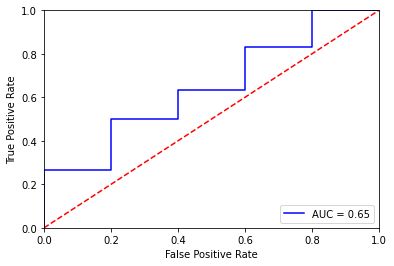

In [ ]:
from sklearn.metrics import roc_curve, auc

# Compute predicted probabilities: y_pred_prob
y_pred_prob = svmmodel.decision_function(X_test)

# Generate ROC curve values: fpr, tpr, thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# Compute ROC AUC
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.plot(fpr, tpr, 'b', label='AUC = %0.2f' % roc_auc)
plt.plot([0, 1], [0, 1], 'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc='lower right')
plt.show()


# Lojistik Regresyon

In [ ]:
from sklearn.linear_model import LogisticRegression
lrmodel=LogisticRegression(C=0.01,solver='liblinear').fit(X_train,y_train)

In [ ]:
y_pred=lrmodel.predict(X_test)
print(y_pred)

[0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 0 1 1 0 0 1 1 1 1 1 1 1 1]


In [ ]:
metrics.accuracy_score(y_test,y_pred)

0.7714285714285715

#Lojistik Regresyon Roc Eğrisi


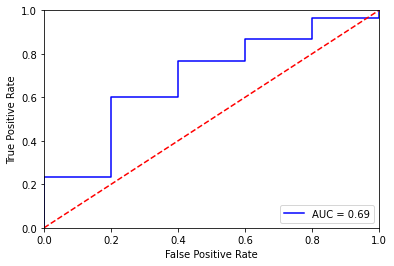

In [ ]:
from sklearn.metrics import roc_curve, auc

# Compute predicted probabilities: y_pred_prob
y_pred_prob = lrmodel.predict_proba(X_test)[:,1]

# Generate ROC curve values: fpr, tpr, thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# Compute ROC AUC
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.plot(fpr, tpr, 'b', label='AUC = %0.2f' % roc_auc)
plt.plot([0, 1], [0, 1], 'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc='lower right')
plt.show()
